# Task 1 - Analysis on ML Test Scores

## import the necessary libraries and load the files needed for our EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [83]:
df = pd.read_csv(r"/content/scores_data.csv")

In [84]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


## Information about data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [86]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

Report: some extra space is ther so we have to remove it by using strip

In [87]:
df.columns = df.columns.str.strip()

In [88]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

## Describe the data - Descriptive statistics

In [89]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [90]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


# Duplicate values


In [116]:
df.duplicated().sum()

0

### Report:  returned 0 thsi means there is not a single duplicate values present in our dataset and it is a very good things to know

---



## Converting Score column like 7/7 to percentage 

In [95]:
df["score"] = df['Score'].str.replace("/","")

In [96]:
df.head(3)

,Batch,User_ID,Score,score
0,AI_ELITE_7,uid_149,6 / 7,6 7
1,AI_ELITE_7,uid_148,6 / 7,6 7
2,AI_ELITE_7,uid_147,7 / 7,7 7


In [97]:
df['score'] = df['score'].str.replace("  ","")

In [105]:
def to_percentage():
    for i in range(len(df['score'])):
        df['score'][i] = int(df['score'][i][0]) / int(df['score'][i][1])
to_percentage()

In [106]:
df.head(3)

,Batch,User_ID,Score,score
0,AI_ELITE_7,uid_149,6 / 7,0.857143
1,AI_ELITE_7,uid_148,6 / 7,0.857143
2,AI_ELITE_7,uid_147,7 / 7,1.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
 3   score    149 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB


## changing datatype object to float

In [108]:
df['score'] = df['score'].astype("float")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batch    149 non-null    object 
 1   User_ID  149 non-null    object 
 2   Score    149 non-null    object 
 3   score    149 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


In [128]:
df.head()

,Batch,User_ID,Score,score
0,AI_ELITE_7,uid_149,6 / 7,0.857143
1,AI_ELITE_7,uid_148,6 / 7,0.857143
2,AI_ELITE_7,uid_147,7 / 7,1.000000
3,AI_ELITE_7,uid_146,7 / 7,1.000000
4,AI_ELITE_7,uid_145,4 / 7,0.571429


In [129]:
df.describe()

,score
count,149.000000
mean,0.626079
std,0.227457
min,0.000000
25%,0.428571
50%,0.571429
75%,0.714286
max,1.000000


## Unique valaues in the data

In [110]:
df['score'].unique()

array([0.85714286, 1.        , 0.57142857, 0.71428571, 0.42857143,
       0.28571429, 0.        , 0.14285714])

In [111]:
df.columns

Index(['Batch', 'User_ID', 'Score', 'score'], dtype='object')

In [112]:
df['Batch'].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

### User_ID unique values and number of unique values

In [115]:
df['User_ID'].nunique()

149

In [114]:
df['User_ID'].unique(),df['User_ID'].nunique()

(array(['uid_149', 'uid_148', 'uid_147', 'uid_146', 'uid_145', 'uid_144',
        'uid_143', 'uid_142', 'uid_141', 'uid_140', 'uid_139', 'uid_138',
        'uid_137', 'uid_136', 'uid_135', 'uid_134', 'uid_133', 'uid_132',
        'uid_131', 'uid_130', 'uid_129', 'uid_128', 'uid_127', 'uid_126',
        'uid_125', 'uid_124', 'uid_123', 'uid_122', 'uid_121', 'uid_120',
        'uid_119', 'uid_118', 'uid_117', 'uid_116', 'uid_115', 'uid_114',
        'uid_113', 'uid_112', 'uid_111', 'uid_110', 'uid_109', 'uid_108',
        'uid_107', 'uid_106', 'uid_105', 'uid_104', 'uid_103', 'uid_102',
        'uid_101', 'uid_100', 'uid_99', 'uid_98', 'uid_97', 'uid_96',
        'uid_95', 'uid_94', 'uid_93', 'uid_92', 'uid_91', 'uid_90',
        'uid_89', 'uid_88', 'uid_87', 'uid_86', 'uid_85', 'uid_84',
        'uid_83', 'uid_82', 'uid_81', 'uid_80', 'uid_79', 'uid_78',
        'uid_77', 'uid_76', 'uid_75', 'uid_74', 'uid_73', 'uid_72',
        'uid_71', 'uid_70', 'uid_69', 'uid_68', 'uid_67', 'uid_66'

## Find the null values

In [123]:
df.isnull().sum()

Batch      0
User_ID    0
Score      0
score      0
dtype: int64

In [124]:
df.isnull().sum().sum()

0

### Report:  
No null values

## Check datatypes

In [125]:
df.dtypes

Batch       object
User_ID     object
Score       object
score      float64
dtype: object

## Filter the data 

In [127]:
print(df['Batch'].unique())
#print(df['User_ID'].unique())
print(df['score'].unique())

['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']
[0.85714286 1.         0.57142857 0.71428571 0.42857143 0.28571429
 0.         0.14285714]


In [131]:
df[df['Batch']=='AI_ELITE_7'].head()

,Batch,User_ID,Score,score
0,AI_ELITE_7,uid_149,6 / 7,0.857143
1,AI_ELITE_7,uid_148,6 / 7,0.857143
2,AI_ELITE_7,uid_147,7 / 7,1.000000
3,AI_ELITE_7,uid_146,7 / 7,1.000000
4,AI_ELITE_7,uid_145,4 / 7,0.571429


In [132]:
df[df['Batch']=='AI_ELITE_6'].head()

,Batch,User_ID,Score,score
53,AI_ELITE_6,uid_96,3 / 7,0.428571
54,AI_ELITE_6,uid_95,4 / 7,0.571429
55,AI_ELITE_6,uid_94,6 / 7,0.857143
56,AI_ELITE_6,uid_93,6 / 7,0.857143
57,AI_ELITE_6,uid_92,4 / 7,0.571429


In [133]:
df[df['Batch']=='AI_ELITE_4'].head()

,Batch,User_ID,Score,score
101,AI_ELITE_4,uid_48,7 / 7,1.000000
102,AI_ELITE_4,uid_47,5 / 7,0.714286
103,AI_ELITE_4,uid_46,4 / 7,0.571429
104,AI_ELITE_4,uid_45,4 / 7,0.571429
105,AI_ELITE_4,uid_44,7 / 7,1.000000


In [136]:
df[df['Score']=='7 / 7'].head()

,Batch,User_ID,Score,score
2,AI_ELITE_7,uid_147,7 / 7,1.0
3,AI_ELITE_7,uid_146,7 / 7,1.0
5,AI_ELITE_7,uid_144,7 / 7,1.0
7,AI_ELITE_7,uid_142,7 / 7,1.0
15,AI_ELITE_7,uid_134,7 / 7,1.0


In [137]:
df[df['score']==1.0].head()

,Batch,User_ID,Score,score
2,AI_ELITE_7,uid_147,7 / 7,1.0
3,AI_ELITE_7,uid_146,7 / 7,1.0
5,AI_ELITE_7,uid_144,7 / 7,1.0
7,AI_ELITE_7,uid_142,7 / 7,1.0
15,AI_ELITE_7,uid_134,7 / 7,1.0


In [140]:
df[df['Score']=='1 / 7'].head()

,Batch,User_ID,Score,score
71,AI_ELITE_6,uid_78,1 / 7,0.142857
97,AI_ELITE_6,uid_52,1 / 7,0.142857
129,AI_ELITE_4,uid_20,1 / 7,0.142857


## Count plot

<Axes: ylabel='count'>

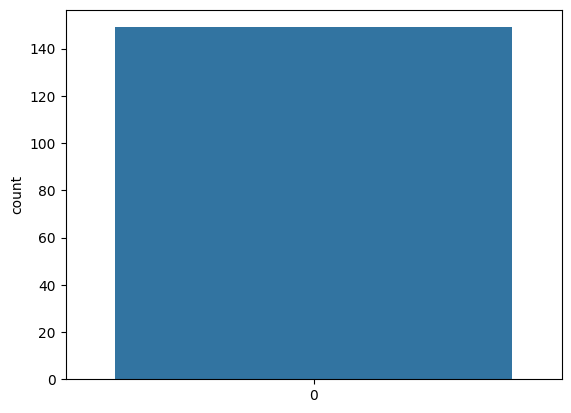

In [169]:
sns.countplot(df['score'])

## Boxplot

<Axes: >

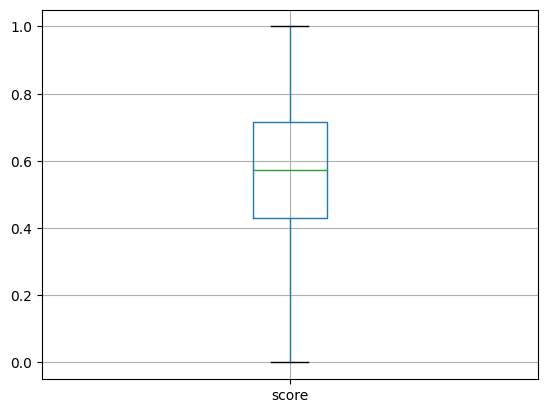

In [143]:
df[['score']].boxplot()

## distributionplot

count    149.000000
mean       0.626079
std        0.227457
min        0.000000
25%        0.428571
50%        0.571429
75%        0.714286
max        1.000000
Name: score, dtype: float64


<ipython-input-151-76c0bb7edf3e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['score'], color='g', bins=100, hist_kws={'alpha': 0.4});


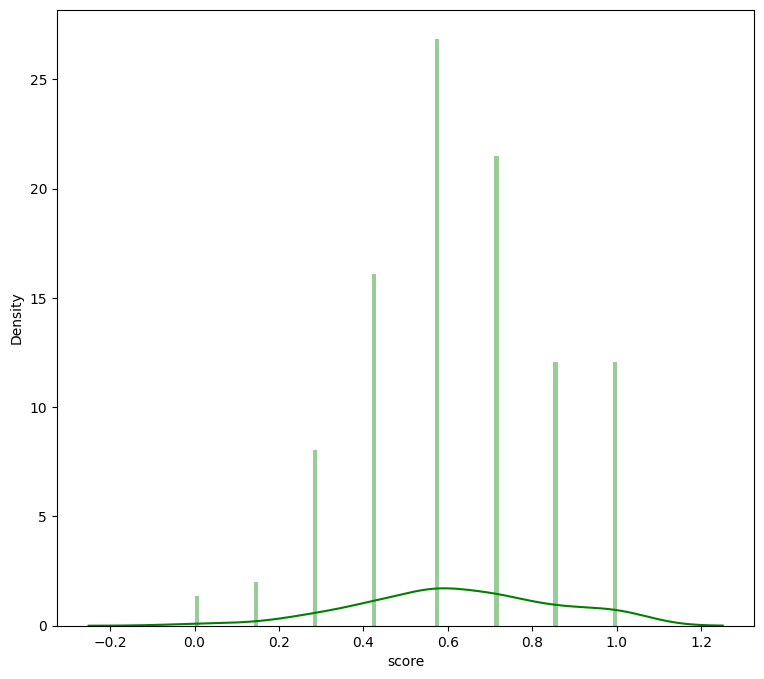

In [151]:
print(df['score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['score'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Boxplot

(array([0, 1, 2]),
 [Text(0, 0, 'AI_ELITE_7'),
  Text(1, 0, 'AI_ELITE_6'),
  Text(2, 0, 'AI_ELITE_4')])

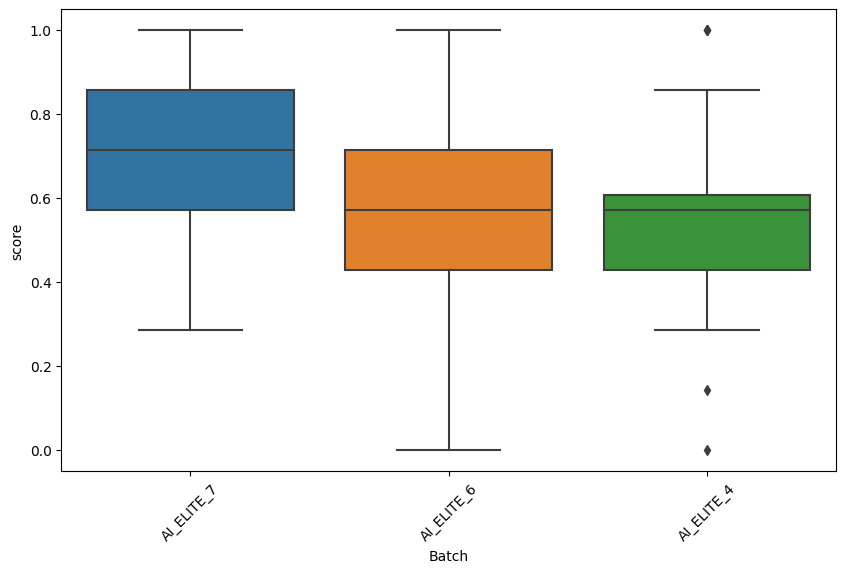

In [158]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Batch', y='score', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

## Countplot

<Axes: xlabel='score', ylabel='count'>

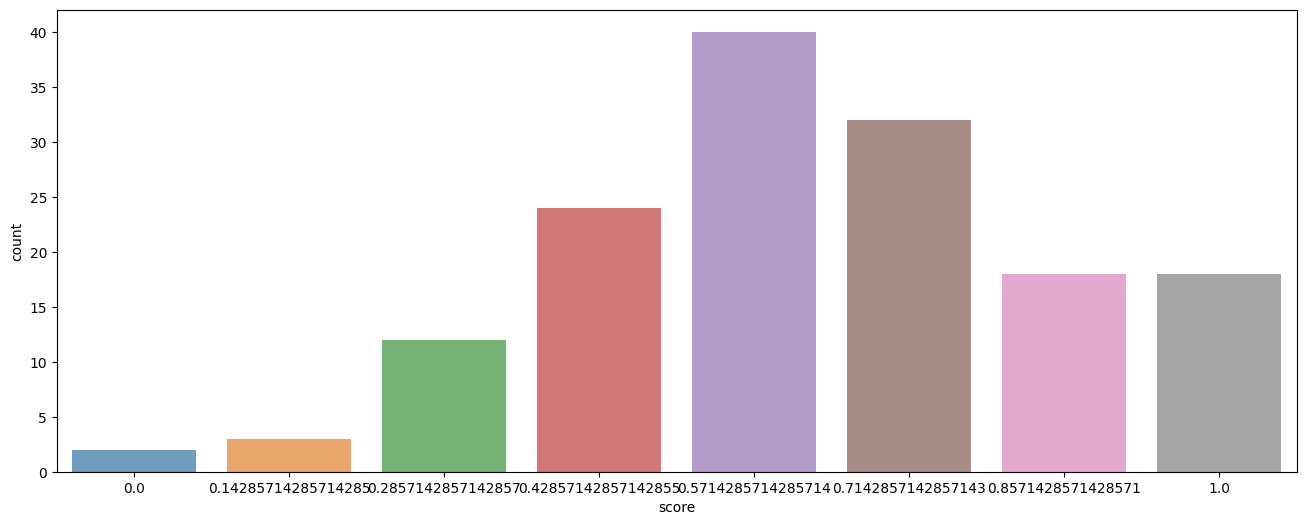

In [156]:
plt.figure(figsize = (16, 6))
sns.countplot(x=df['score'], alpha=0.7, data=df)

## Histplot

<Axes: xlabel='score', ylabel='Count'>

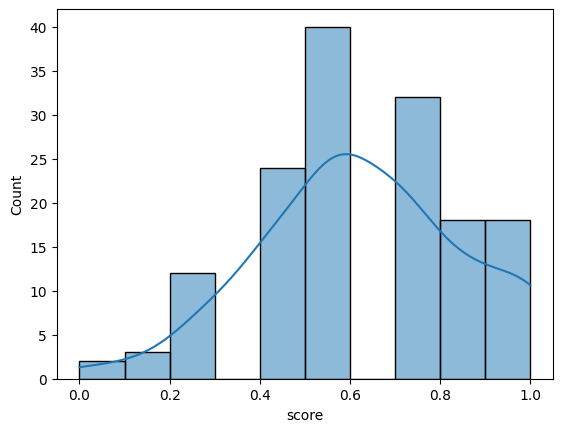

In [162]:
sns.histplot(df['score'],kde=True)

<Axes: xlabel='Batch', ylabel='Count'>

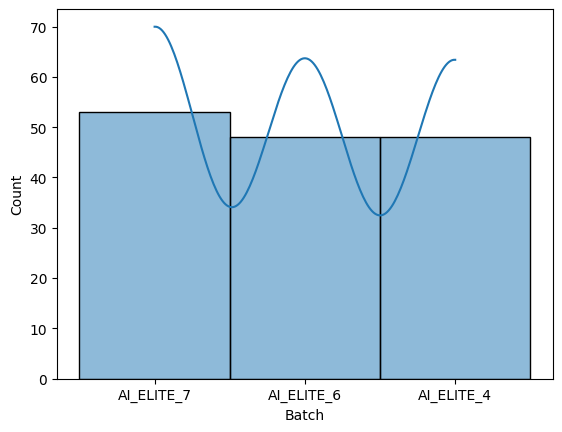

In [163]:
sns.histplot(df['Batch'],kde=True)

<Axes: xlabel='User_ID', ylabel='Count'>

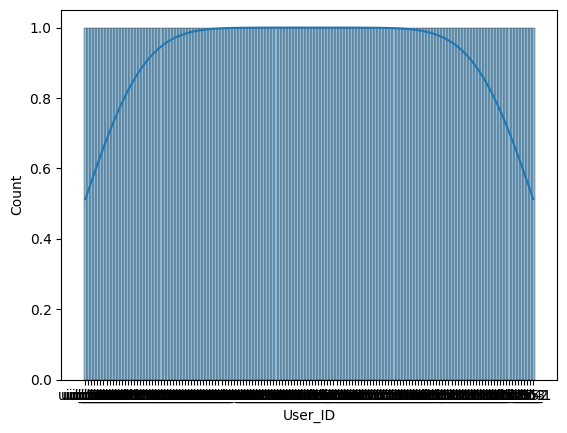

In [166]:
sns.histplot(df['User_ID'],kde=True)

<Axes: xlabel='score', ylabel='count'>

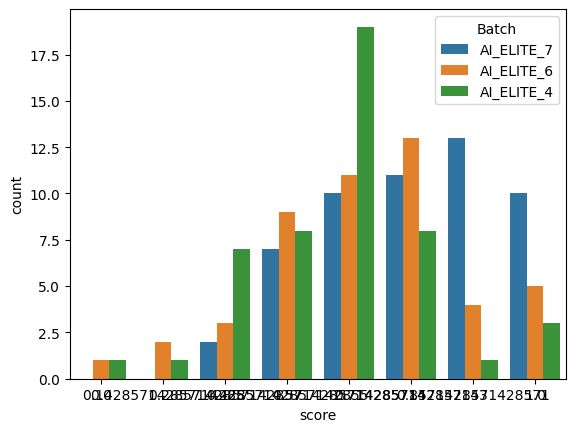

In [170]:
sns.countplot(data=df,x='score',hue="Batch")

## Correlation Plot

In [145]:
df.corr()

<ipython-input-145-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,score
score,1.0


<ipython-input-146-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

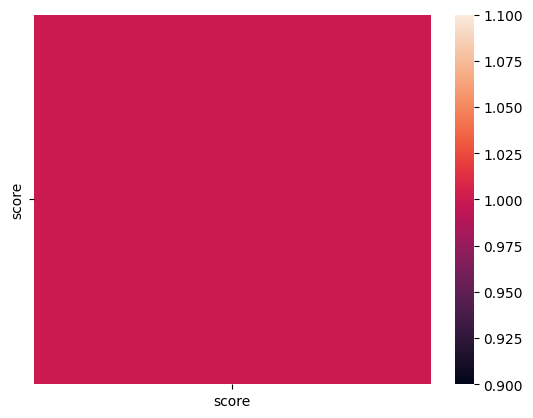

In [146]:
sns.heatmap(df.corr())